# Cleaning and Analyzing Employee Exit Surveys

---

In this project we will use the exit surveys from employees of the <b>Department of Education, Training and Employment (DETE)</b> and the <b>Technical and Further Education (TAFE)</b> institute in Queensland, Australia. The TAFE exit survey can be found __[here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)__ and the survey for the DETE __[here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)__ .

We will try to find the answer to a few questions:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

<h2> Short introduction to our data</h2>

---
There are 2 data sources, dete_survey.csv and tafe_survey.csv.

Some of the important in <i>dete_survey.csv</i> we can find:

<ul>
    <li><b>ID</b>: An id used to identify the participant of the survey
    <li><b>SeparationType</b>: The reason why the person's employment ended
    <li><b>Cease Date</b>: The year or month the person's employment ended
    <li><b>DETE Start Date</b>: The year the person began employment with the DETE
</ul>

Meanwhile, in <i>tafe_survey.csv</i>:
<ul>
    <li><b>Record ID</b>: An id used to identify the participant of the survey
    <li><b>Reason for ceasing employment</b>: The reason why the person's employment ended
    <li><b>LengthofServiceOverall. Overall Length of Service at Institute (in years)</b>: The length of the person's employment (in years)
</ul>

<h3> Diving into the data </h3>

---

In this part we will get a first sight of our data and draw a few conclusions based on it.

In [1]:
# Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots inline
%matplotlib inline

# styling plot for size and spines
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

In [2]:
# reading in the DETE data and a quick preview of the columns that we will work with
dete_survey = pd.read_csv("dete_survey.csv")
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
# show first 5 records
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# Reading in the TAFE data and having a quick view of the data
tafe_survey = pd.read_csv("tafe_survey.csv")
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
# Looking at the first 5 rows
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


<h2> Conclusions </h2>

1. In the dete_survey dataframe we have values that are missing indicated by 'Not Stated'in place of NaN
2. We can drop some of the columns that we don't need in both of the dataframes
3. Each dataframe has many of the same columns but with different names. (e.g. Cease Date in dete_survey and CESSATION YEAR in tafe_survey)
4. We can identify multiple columns that can indicate that an employee resigned because they were dissatisfied

<h2> Data Cleaning </h2>

---

The 'Not Stated' values will be replaced with NaN values. Afterwards the unneeded columns will be deleted.

In [6]:
# Reading the data and replacing 'Not Stated' values
dete_survey_updated = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

In [7]:
# Drop unneeded columns from DETE dataframe
dete_survey_updated = dete_survey_updated.drop(dete_survey.columns[28:49], axis = 1)

# Drop unneeded columns from TAFE dataframe
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [8]:
# Getting a glimpse of dete_survey
dete_survey[['ID', 'SeparationType', 'Cease Date', 'DETE Start Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               822 non-null    int64 
 1   SeparationType   822 non-null    object
 2   Cease Date       822 non-null    object
 3   DETE Start Date  822 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.8+ KB


In [9]:
dete_survey['SeparationType'].value_counts(normalize = True)

Age Retirement                          0.346715
Resignation-Other reasons               0.182482
Resignation-Other employer              0.110706
Resignation-Move overseas/interstate    0.085158
Voluntary Early Retirement (VER)        0.081509
Ill Health Retirement                   0.074209
Other                                   0.059611
Contract Expired                        0.041363
Termination                             0.018248
Name: SeparationType, dtype: float64

In [10]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [11]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

<h3> Standardizing column names across the two dataframes </h3>

The two databases need to have the same names in order to combine them.

<table>
<thead>
<tr><th>dete_survey</th><th>tafe_survey</th><th>Definition</th></tr>
</thead>
<tbody>
<tr><td>ID</td><td>Record ID</td><td>An id used to identify the participant of the survey</td></tr>
<tr><td>SeparationType</td><td>Reason for ceasing employment</td><td>The reason why the participant's employment ended</td></tr>
<tr><td>Cease Date</td><td>CESSATION YEAR</td><td>The year or month the participant's employment ended</td></tr>
<tr><td>DETE Start Date</td><td></td><td>The year the participant began employment with the DETE</td></tr>
<tr><td></td><td>LengthofServiceOverall. 
Overall Length of Service
at Institute (in years)</td><td>The length of the person's employment (in years)</td></tr>
<tr><td>Age</td><td>CurrentAge. Current Age</td><td>The age of the participant</td></tr>
<tr><td>Gender</td><td>Gender. What is your Gender?</td><td>The gender of the participant</td></tr>
</tbody>
</table>

In [12]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [13]:
# Rework dete columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
# Rename the columns from tafe_survey
tafe_survey_updated = tafe_survey_updated.rename(columns={"Record ID": "id", 
                                                            "CESSATION YEAR": "cease_date", 
                                                            "Reason for ceasing employment": "separationtype",
                                                            "Gender. What is your Gender?": "gender", 
                                                            "CurrentAge. Current Age": "age", 
                                                            "Employment Type. Employment Type": "employment_status",
                                                            "Classification. Classification": "position",
                                                            "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
                                                            "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"
                                                           })
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

<h3> Removing more data </h3>

---

In [15]:
dete_survey_updated.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

We can see that there are only three values in the separationtype column that are necessary to our analysis:

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

Therefore we can discard any rows that do not contain the the string 'Resignation'.

In [16]:
tafe_survey_updated.separationtype.value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

Only 1 NaN value seems to be present in TAFE. Because there is no way to know for sure if the employee decided to resign or not, the na parameter for str.contains will be set to False

In [17]:
# using copy to avoid SettingWithCopy Warning
pattern = r"[Rr]esignation"
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern, na = False)].copy()

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [18]:
# removing the NA values
tafe_survey_updated_na = tafe_survey_updated[~tafe_survey_updated['separationtype'].isnull()]

In [19]:
# filter to get the rows with resignation
tafe_resignations = tafe_survey_updated_na[tafe_survey_updated_na['separationtype'].str.contains(pattern)].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In order to investigate further the causes of resignation, there was a check for nulls where they were filtered out. There was only 1 NA found in <b>tafe_survey_updated</b>. In order to avoid SettingsWithCopy warning, the copy function was used.

<h3> Cleaning the cease date column </h3>

---

In [20]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

The cease_date column from <b>dete_resignations</b> seems to have mixed dates (month + year, year and Not Stated values). We will only keep the years on order to go further.

In [21]:
date_pattern = r"([1-2][0-9]{3})" # matching pattern for years
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(date_pattern) # extract the years

In [22]:
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [23]:
# change column type to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [24]:
# view the dates sorted
dete_resignations['cease_date'].value_counts().sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [25]:
# check out dete_start_date values
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = True)
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype(float)

In [26]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending = True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

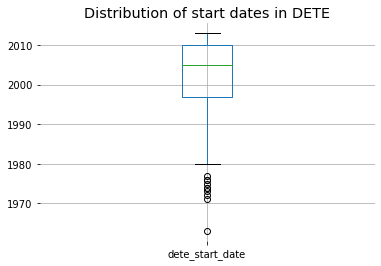

In [27]:
dete_resignations.boxplot("dete_start_date")
plt.title("Distribution of start dates in DETE")
plt.show()

There can be noticed that there are a few outliers that have started to work in the company as early as 1963.

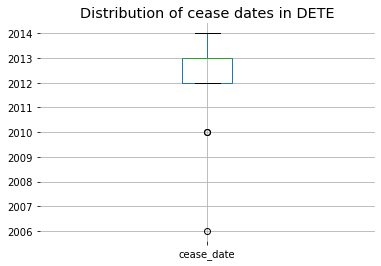

In [28]:
dete_resignations.boxplot("cease_date")
plt.title("Distribution of cease dates in DETE")
plt.show()

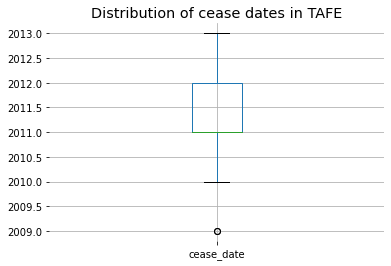

In [29]:
tafe_resignations.boxplot("cease_date")
plt.title("Distribution of cease dates in TAFE")
plt.show()

It can noticed that the <b>cease_dates</b> start from 2006 until 2014 in DETE and the ones in TAFE from 2009 to 2013. However, the distributions in <b>DETE</b> and </b>TAFE</b> look good. The difference in years should not impact our analysis.

In [30]:
# creating new column to see how much people stood in their role
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [31]:
dete_resignations['institute_service'].value_counts().sort_index(ascending = True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In [32]:
dete_resignations[["dete_start_date", "cease_date", "institute_service"]].head()

,dete_start_date,cease_date,institute_service
3,2005.0,2012.0,7.0
5,1994.0,2012.0,18.0
8,2009.0,2012.0,3.0
9,1997.0,2012.0,15.0
11,2009.0,2012.0,3.0


<h2> Identifying dissatisfied employees </h2>

---

1. <b>tafe_survey_updated</b>:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction
2. <b>dete_survey_updated</b>:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, they will be marked as dissatisfied in a new column.

In [33]:
dete_resignations.columns = (dete_resignations.columns.
                               str.lower().
                               str.strip().
                               str.replace(' ','_', regex = False).
                               str.replace('.','_', regex = False).
                               str.replace('/','_', regex = False).
                               str.replace(':','_', regex = False).
                               str.replace('(','', regex = False).
                               str.replace(')','', regex = False).
                               str.replace('?','', regex = False).
                               str.replace('__','_', regex = False)
                              )

tafe_resignations.columns = (tafe_resignations.columns.
                               str.lower().
                               str.strip().
                               str.replace(' ','_', regex = False).
                               str.replace('.','_', regex = False).
                               str.replace('/','_', regex = False).
                               str.replace(':','_', regex = False).
                               str.replace('(','', regex = False).
                               str.replace(')','', regex = False).
                               str.replace('?','', regex = False).
                               str.replace('__','_', regex = False)
                              )

In [34]:
tafe_resignations.rename(columns = {'contributing_factors_dissatisfaction' : 'factor_dissatisfaction',
                                    'contributing_factors_job_dissatisfaction' : 'factor_job_dissatisfaction', 
                                    'contributing_factors_interpersonal_conflict': 'factor_interpersonal_conflict'}, inplace = True)

In [35]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [36]:
tafe_resignations.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_-_public_sector',
       'contributing_factors_career_move_-_private_sector',
       'contributing_factors_career_move_-_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity_family', 'factor_dissatisfaction',
       'factor_job_dissatisfaction', 'factor_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [37]:
print(tafe_resignations['factor_dissatisfaction'].value_counts(dropna = False), "\n")

print(tafe_resignations['factor_job_dissatisfaction'].value_counts(dropna = False), "\n")

print(tafe_resignations['factor_interpersonal_conflict'].value_counts(dropna = False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: factor_dissatisfaction, dtype: int64 

-                      270
Job Dissatisfaction     62
NaN                      8
Name: factor_job_dissatisfaction, dtype: int64 

-                         308
Interpersonal Conflict     24
NaN                         8
Name: factor_interpersonal_conflict, dtype: int64


In [38]:
# function to modify values in True, False and NaN
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False 
    else:
        return True

# apply the function to the 2 columns
cols = ['factor_dissatisfaction', 'factor_job_dissatisfaction', 'factor_interpersonal_conflict']
tafe_resignations[cols] = tafe_resignations[cols].applymap(update_vals)

print(tafe_resignations['factor_dissatisfaction'].value_counts(dropna=False), "\n")
print(tafe_resignations['factor_interpersonal_conflict'].value_counts(dropna=False), "\n")
print(tafe_resignations['factor_job_dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: factor_dissatisfaction, dtype: int64 

False    308
True      24
NaN        8
Name: factor_interpersonal_conflict, dtype: int64 

False    270
True      62
NaN        8
Name: factor_job_dissatisfaction, dtype: int64


In [39]:
tafe_resignations['dissatisfied'] = tafe_resignations[cols].any(axis = 1, skipna = False)

In [40]:
columns = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment",
           "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions",
           "work_life_balance", "workload"]

dete_resignations['dissatisfied'] = dete_resignations[columns].any(axis = 1, skipna = False)

In [41]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [42]:
# deep copy the dataframes 
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [43]:
# 2 columns to tell the difference between DETE and TAFE after concat
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

To recap, until this point we have:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new <b>institute_service</b> column
* Cleaned the <b>Contributing Factors</b> column
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

<h2> Getting the data together </h2>

---

In [44]:
# vertical combine the 2 dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

In [45]:
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,contributing_factors_ill_health,contributing_factors_maternity_family,factor_dissatisfaction,factor_job_dissatisfaction,factor_interpersonal_conflict,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# summing up nulls for each column
check_null = combined.isnull().sum()

# show columns with 1 or more NULL values
null_cols = check_null.loc[check_null != 0]
print(null_cols)

cease_date                                             16
dete_start_date                                       368
role_start_date                                       380
position                                               53
classification                                        490
region                                                386
business_unit                                         619
employment_status                                      54
career_move_to_public_sector                          340
career_move_to_private_sector                         340
interpersonal_conflicts                               340
job_dissatisfaction                                   340
dissatisfaction_with_the_department                   340
physical_work_environment                             340
lack_of_recognition                                   340
lack_of_job_security                                  340
work_location                                         340
employment_con

In [47]:
# drop columns that have less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 1)

In [48]:
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

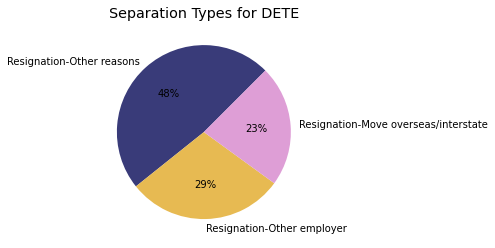

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [49]:
combined_updated.loc[combined['institute'] == 'DETE', 'separationtype'].value_counts().plot(kind = 'pie',
                                                                                              autopct = '%1.0f%%',
                                                                                              startangle = 45,
                                                                                              cmap = 'tab20b'
                                                                                             )
plt.ylabel("")
plt.title('Separation Types for DETE')
plt.show()
combined_updated.loc[combined['institute'] == 'DETE', 'separationtype'].value_counts()

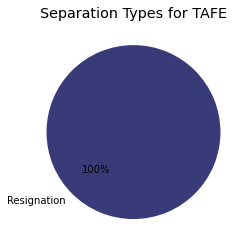

Resignation    340
Name: separationtype, dtype: int64

In [50]:
combined_updated.loc[combined['institute'] == 'TAFE', 'separationtype'].value_counts().plot(kind='pie',
                                                          autopct = '%1.0f%%',
                                                          startangle = 45,
                                                          cmap='tab20b'
                                                         )
plt.ylabel("")
plt.title('Separation Types for TAFE')
plt.show()
combined_updated.loc[combined['institute'] == 'TAFE', 'separationtype'].value_counts()

<h2> Cleaning up the institute service column </h2>

---

In [51]:
combined.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


At this step we will convert the numbers into categories:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [52]:
# deep copy 
combined_updated_new = combined_updated.copy()

# transform to a string and extract the years from institute service
combined_updated_new["institute_service"] = combined_updated["institute_service"].astype('str').str.extract(r"(\d+)")

# transform to numeric 
combined_updated_new["institute_service"] = combined_updated_new["institute_service"].astype(float)

# glimpse of the values
combined_updated_new["institute_service"].value_counts().sort_index(ascending = True)

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service, dtype: int64

In [53]:
# changing the institute service column from numeric to categorical
def career_stage(service):
    if pd.isnull(service):
        pass
    elif service < 3:
        return "New"
    elif service < 7:
        return "Experienced"
    elif service < 11:
        return "Established"
    else: 
        return "Veteran"

combined_updated_new["service_cat"] = combined_updated_new["institute_service"].apply(career_stage)

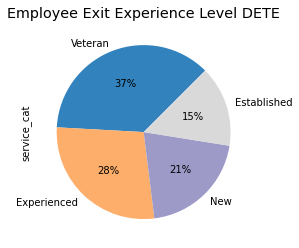

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [54]:
# Plotting overall service categories
combined_updated_new.loc[combined_updated_new['institute'] == 'DETE','service_cat'].value_counts().plot(
                                                                                            kind = 'pie',
                                                                                            autopct = '%1.0f%%',
                                                                                            startangle = 45,
                                                                                            cmap='tab20c'
                                                                                            )
plt.title('Employee Exit Experience Level DETE')
plt.show()
combined_updated_new['service_cat'].value_counts()

For DETE, it seems that 51% of those who leave have stayed for 7 or more years in the company.

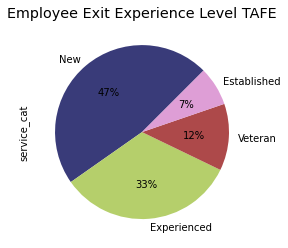

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [55]:
# Plotting overall service categories
combined_updated_new.loc[combined_updated_new['institute'] == 'TAFE','service_cat'].value_counts().plot(
                                                                                kind = 'pie',
                                                                                autopct = '%1.0f%%',
                                                                                startangle = 45,
                                                                                cmap = 'tab20b'
                                                                                )
plt.title('Employee Exit Experience Level TAFE')
plt.show()
combined_updated_new['service_cat'].value_counts()

For TAFE it seems 80% of those who leave have stayed in the company 7 or less years.

<h2> Cleaning the age column </h2>

---

In [56]:
combined_updated_new["age"].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [57]:
# deep copy age column
age_copy = combined_updated_new["age"].copy()

# strip white spaces, repair intervals
age_clean = age_copy.str.strip().str.replace("  ", "-").str.replace("56 or older", "56-60")

# copy the column back
combined_updated_new["age"] = age_clean.copy()
print(combined_updated_new.age.value_counts())

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56-60            55
61 or older      23
20 or younger    10
Name: age, dtype: int64


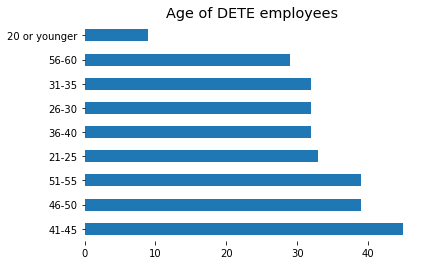

41-45            16.0
46-50            13.0
51-55            13.0
21-25            11.0
36-40            11.0
26-30            11.0
31-35            11.0
56-60            10.0
20 or younger     3.0
Name: age, dtype: float64

In [58]:
# Plotting overall service categories
combined_updated_new.loc[combined_updated_new['institute'] == 'TAFE','age'].value_counts().plot(kind='barh')

plt.title('Age of DETE employees')
plt.show()
round(combined_updated_new.loc[combined_updated_new['institute'] == 'TAFE','age'].value_counts(normalize = True) * 100)

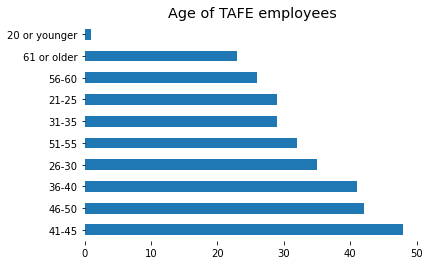

41-45            16.0
46-50            14.0
36-40            13.0
26-30            11.0
51-55            10.0
31-35             9.0
21-25             9.0
56-60             8.0
61 or older       8.0
20 or younger     0.0
Name: age, dtype: float64

In [59]:
# Plotting overall service categories
combined_updated_new.loc[combined_updated_new['institute'] == 'DETE','age'].value_counts().plot(kind='barh')

plt.title('Age of TAFE employees')
plt.show()
round(combined_updated_new.loc[combined_updated_new['institute'] == 'DETE','age'].value_counts(normalize = True)* 100)

In <b>DETE</b> we can find more old aged people working than in <b>TAFE</b> where none of the workers are more than 60 years old.

<h2> Cleaning the dissatisfied column </h2>

---

In [60]:
print("Count \n")
print(combined_updated_new["dissatisfied"].value_counts(dropna = False))

print("\nRelative frequency\n")
print(round(combined_updated_new["dissatisfied"].value_counts(dropna = False, normalize = True) * 100))

Count 

False    397
True     246
NaN        8
Name: dissatisfied, dtype: int64

Relative frequency

False    61.0
True     38.0
NaN       1.0
Name: dissatisfied, dtype: float64


In [61]:
# move NaN values to False
combined_updated_new.fillna(value = {"dissatisfied": False}, inplace = True)

# validate changes
combined_updated_new["dissatisfied"].value_counts(dropna = False)

False    405
True     246
Name: dissatisfied, dtype: int64

In [62]:
combined_updated_new.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'service_cat'],
      dtype='object')

In [63]:
pv_combined_updated = pd.pivot_table(combined_updated_new, index = 'service_cat', values = 'dissatisfied')

pv_combined_updated.head()

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.354651
New,0.316062
Veteran,0.485294


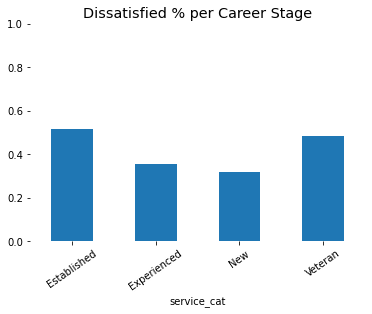

In [64]:
pv_combined_updated.plot(
                         kind = 'bar', 
                         ylim = (0,1), 
                         rot = 35,
                         title = 'Dissatisfied % per Career Stage', 
                         legend=False)

It seems that the more the people stay, the more they are dissatisfied.

In [65]:
combined_updated_new.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'service_cat'],
      dtype='object')

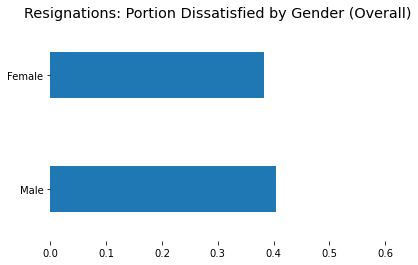

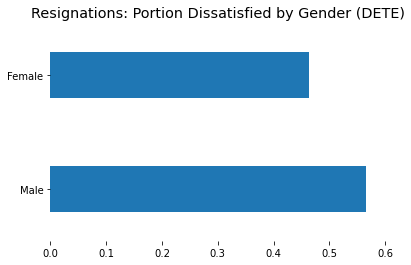

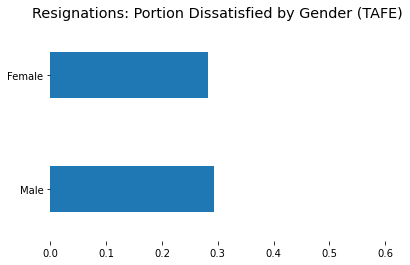

In [66]:
# Dataframes filtered by institution
dete_resignation = combined_updated_new[combined_updated_new['institute'] == 'DETE'].copy()
tafe_resignation = combined_updated_new[combined_updated_new['institute'] == 'TAFE'].copy()

# Setting up tables
gender_diss_table = combined_updated_new.pivot_table(index = 'gender', values = 'dissatisfied')
dete_gender_diss_table = dete_resignation.pivot_table(index = 'gender', values = 'dissatisfied')
tafe_gender_diss_table = tafe_resignation.pivot_table(index = 'gender', values = 'dissatisfied')

# Lists of lists for looping over 
gender_diss_tables = [gender_diss_table, dete_gender_diss_table, tafe_gender_diss_table]
gender_diss_titles = ["Overall", "DETE", "TAFE"]

# Generating Horizontal Bar Graphs
sides = ['top', 'right', 'left']
for sp in range(0,3):
    ax = gender_diss_tables[sp].sort_index(ascending=False).plot(kind='barh', legend=False, width=0.4)
    ax.set_title("Resignations: Portion Dissatisfied by Gender ({})".format(gender_diss_titles[sp]))
    for side in sides:
        ax.spines[side].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlim(0, 0.6)
plt.show()

More male workers seem to be dissatisfied in in DETE, while in TAFE it's pretty much the same proportion between male and female.

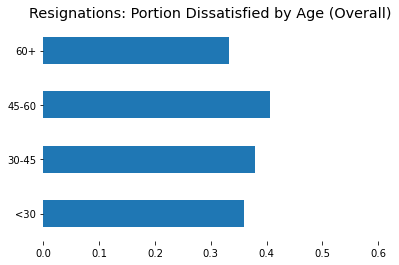

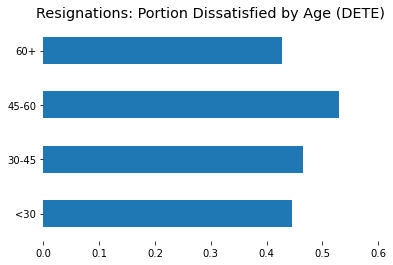

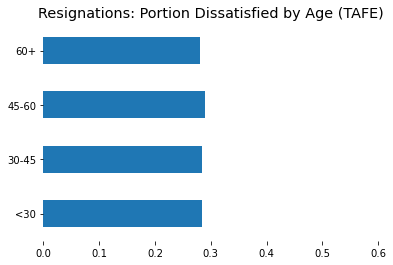

In [67]:
def age_group(val):
    if val in ["20 or younger", "21-25", "26-30"]:
        return "<30"
    elif val in ["31-35", "36-40", "41-45"]:
        return '30-45'
    elif val in ["46-50", "51-55", "56-60"]:
        return '45-60'
    else:
        return '60+'

combined_updated_new['age_group'] = combined_updated_new['age'].apply(age_group)
combined_updated_new['age_group'] = pd.Categorical(combined_updated_new['age_group'],
                                                   ordered=True,
                                                   categories = ['60+', '45-60', '30-45', '<30']
                                                  )
# Dataframes filtered by institution
dete_resignation = combined_updated_new[combined_updated_new['institute'] == 'DETE'].copy()
tafe_resignation = combined_updated_new[combined_updated_new['institute'] == 'TAFE'].copy()

# Setting up tables
age_diss_table = combined_updated_new.pivot_table(index = 'age_group', values = 'dissatisfied')
dete_age_diss_table = dete_resignation.pivot_table(index = 'age_group', values = 'dissatisfied')
tafe_age_diss_table = tafe_resignation.pivot_table(index = 'age_group', values = 'dissatisfied')

# Lists of lists for looping over 
age_diss_tables = [age_diss_table, dete_age_diss_table, tafe_age_diss_table]
age_diss_titles = ["Overall", "DETE", "TAFE"]

# Generating Horizontal Bar Graphs
sides = ['top', 'right', 'left']
for sp in range(0,3):
    ax = age_diss_tables[sp].sort_index(ascending=False).plot(kind = 'barh', legend = False)
    ax.set_title("Resignations: Portion Dissatisfied by Age ({})".format(age_diss_titles[sp]))
    for side in sides:
        ax.spines[side].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlim(0, 0.6)
plt.show()

Workers between 45-60 years old seem to be the most dissatisfied in both companies, while those 60+ years old the least.

<h2> Recap </h2>

---

* Explored the data and figured out how to prepare it for analysis
* Corrected some of the missing values
* Dropped any data not needed for our analysis
* Renamed our columns
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way
* Combined the data
* Cleaned the institute_service column
* Handled the missing values in the dissatisfied column
* Aggregated the data
* Explored the dissatisfied people per career stage
* Pivoted the data in order to create plots for dissatisfaction by age and gender

<h2> Conclusions </h2>

---

Our initial questions were:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


* Based on the analysis, it can be said that the most dissatisfied employees were those <b>Experienced (3-7 years of work in the institute)</b> and the <b>Veteran ones (11 + years)</b>.
* The most common age bracket for the workers in both institutes is <b>41-45</b> years old.
* <b>TAFE</b> has a problem with <b>New employees (< 3 years)</b> and <b>Experienced ones (3-7 years)</b> resigning, while <b>DETE</b> has a problem with the more experienced ones <b>Veteran (11+ years)</b> and <b>Established (7-11 years)</b>.
* More <b>male</b> than <b>female</b> workers have been dissatisfied with their job in both institutes.
* <b>DETE workers</b> are much more dissatisfied with their job than their counterpart at <b>TEFE</b> with <b>DETE</b> workers hovering around <b>50-60% dissatisfaction</b> and <b>TAFE workers</b> at <b>30%</b> at all age brackets.
* New workers are the most unlikely to resign due to dissatisfaction, while the ones that stayed for a long time in the institute are likely to do so.